# Exploracion datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import ydata_profiling 
import scipy.stats as stats
import statsmodels.api as sm

In [2]:

df = pd.read_csv('./data/datos_apartamentos_rent.csv', sep=';')

In [3]:
ydata_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
#Nombres de columnas
df.columns = df.columns.str.strip()

df.columns = df.columns.str.replace(',', '', regex=True)  
df = df.rename(columns={df.columns[-1]: "time"})  


df['square_feet'] = pd.to_numeric(df['square_feet'], errors='coerce')


print(df.columns.tolist())


['id', 'category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms', 'currency', 'fee', 'has_photo', 'pets_allowed', 'price', 'price_display', 'price_type', 'square_feet', 'address', 'cityname', 'state', 'latitude', 'longitude', 'source', 'time']


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  object 
 1   category       9999 non-null   object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      6452 non-null   object 
 5   bathrooms      9966 non-null   object 
 6   bedrooms       9993 non-null   object 
 7   currency       9976 non-null   object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   5861 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  9958 non-null   object 
 13  price_type     10000 non-null  object 
 14  square_feet    9954 non-null   float64
 15  address        6715 non-null   object 
 16  cityname       9923 non-null   object 
 17  state          9923 non-null   object 
 18  latitud

In [6]:
# datos nulos 
print(df.isnull().sum())

id                  0
category            1
title               0
body                0
amenities        3548
bathrooms          34
bedrooms            7
currency           24
fee                 0
has_photo           0
pets_allowed     4139
price               0
price_display      42
price_type          0
square_feet        46
address          3285
cityname           77
state              77
latitude           10
longitude          56
source             46
time               46
dtype: int64


In [7]:
# cambiar la categoria de las variables 

df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['square_feet'] = pd.to_numeric(df['square_feet'], errors='coerce')
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')
df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce')


print(df[['price', 'square_feet', 'bathrooms', 'bedrooms']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        10000 non-null  int64  
 1   square_feet  9954 non-null   float64
 2   bathrooms    9920 non-null   float64
 3   bedrooms     9947 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 312.6 KB
None


In [8]:
# Estadísticas generales de las variables numéricas
print(df.describe())

         bathrooms     bedrooms         price   square_feet    longitude
count  9920.000000  9947.000000  10000.000000   9954.000000  9944.000000
mean      1.379940     1.744144   1482.881600    945.911995   -94.675157
std       0.615524     0.942540   1074.952131    656.645664    15.762033
min       1.000000     0.000000    200.000000    101.000000  -158.022100
25%       1.000000     1.000000    945.000000    649.000000  -101.301700
50%       1.000000     2.000000   1267.500000    802.000000   -93.651600
75%       2.000000     2.000000   1695.000000   1100.000000   -82.313000
max       8.500000     9.000000  52500.000000  40000.000000   -70.191600


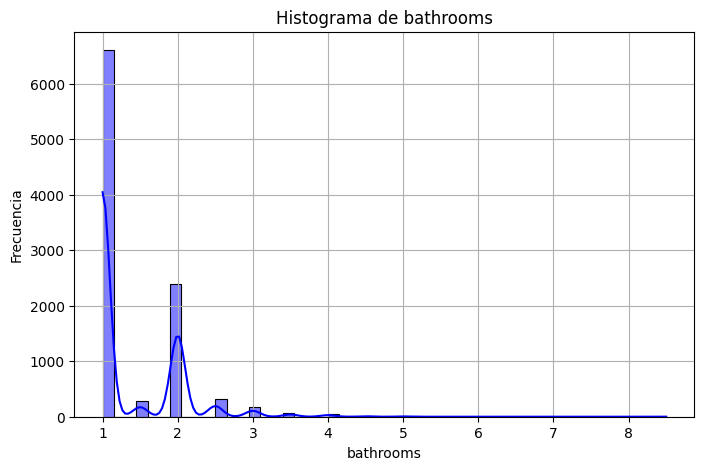

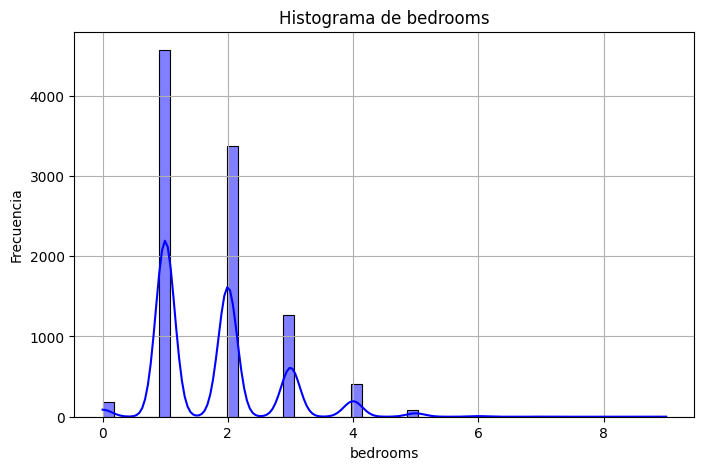

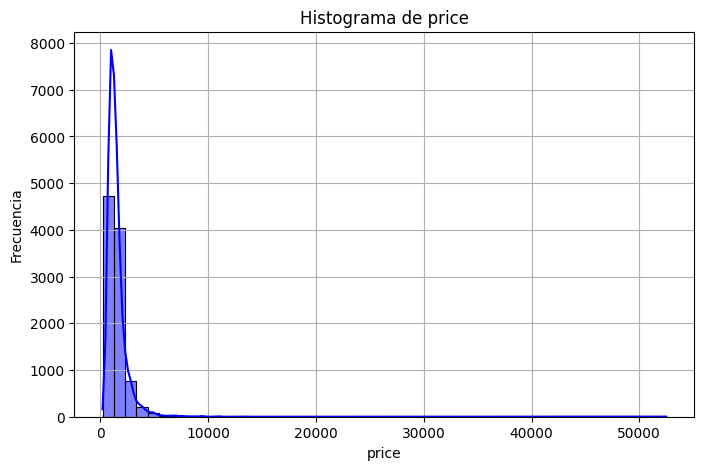

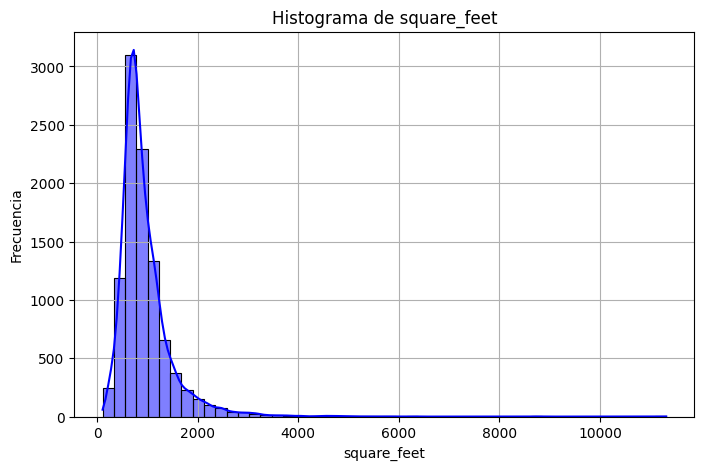

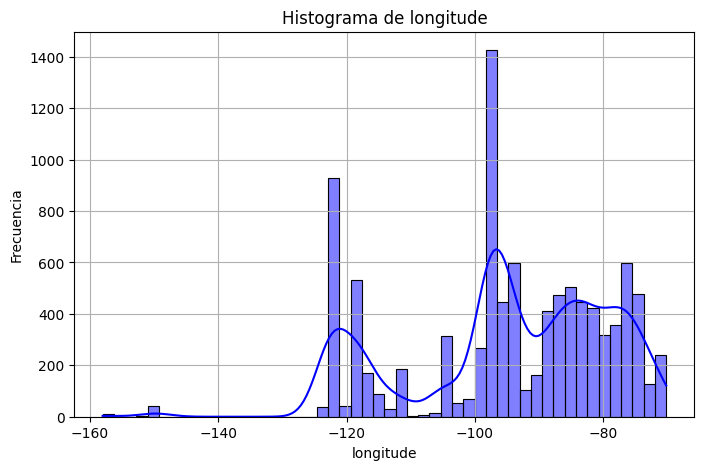

In [9]:
# Histograma de variables numericas
%matplotlib inline
numeric_columns = ['bathrooms', 'bedrooms', 'price', 'square_feet', 'longitude']

df_clean = df.dropna(subset=numeric_columns)

for col in numeric_columns:
    plt.figure(figsize=(8, 5))  
    sb.histplot(df_clean[col], bins=50, kde=True, color='blue')  
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()  

In [10]:
# Ver estadística de variables categóricas
print(df.describe(include=['O']))

                id                category                        title  \
count        10000                    9999                        10000   
unique       10000                      32                         9327   
top     5509132540  housing/rent/apartment  Apartment in great location   
freq             1                    9950                           38   

         body                amenities currency    fee  has_photo  \
count   10000                     6452     9976  10000      10000   
unique   9922                     2252        3     41         43   
top         2  Dishwasher,Refrigerator      USD     No  Thumbnail   
freq       22                      224     9954   9954       8884   

       pets_allowed price_display price_type  address cityname state latitude  \
count          5861          9958      10000     6715     9923  9923     9990   
unique            5          1730         37     6690     1608    56     2435   
top       Cats,Dogs        $1,350  

C:\Users\andy\AppData\Local\Temp\ipykernel_49988\1162452548.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(y=df[col], order=df[col].value_counts().index, palette='coolwarm')


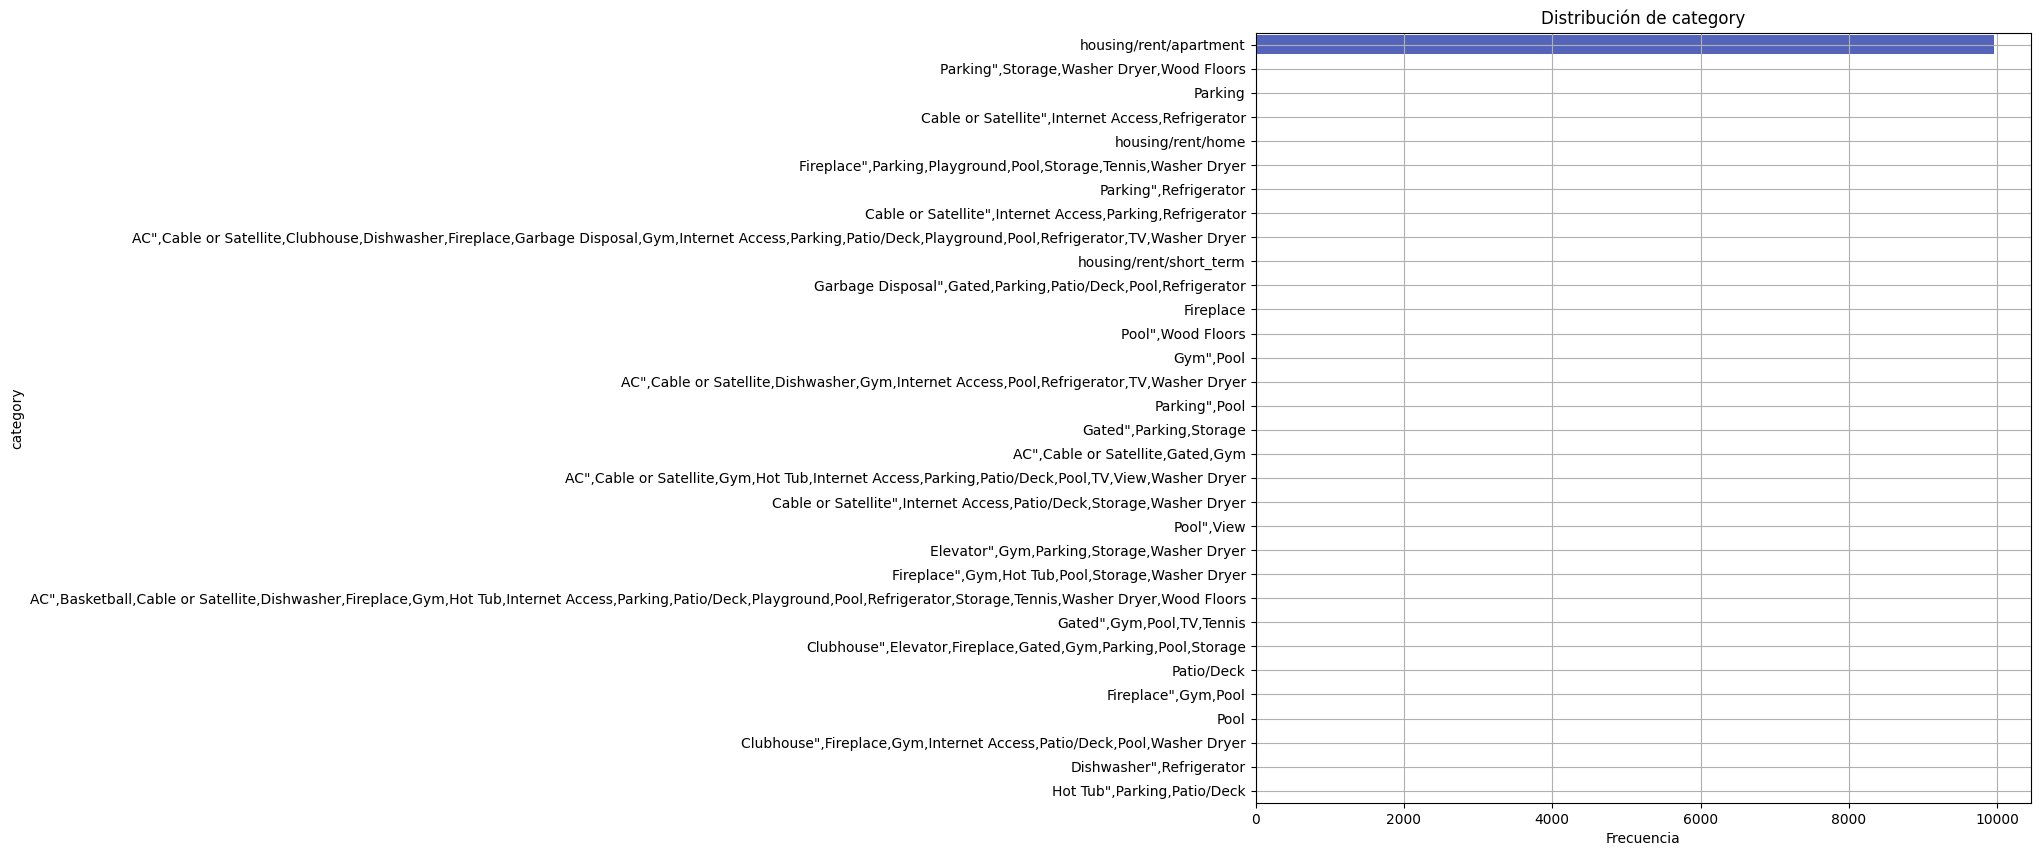

C:\Users\andy\AppData\Local\Temp\ipykernel_49988\1162452548.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(y=df[col], order=df[col].value_counts().index, palette='coolwarm')


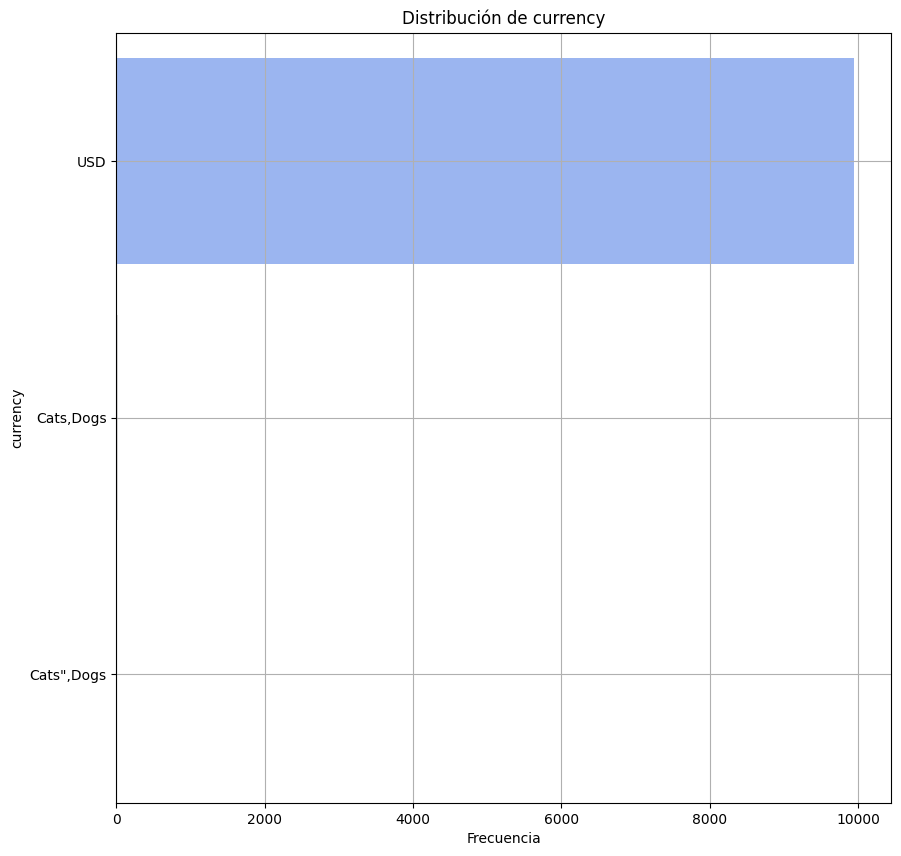

C:\Users\andy\AppData\Local\Temp\ipykernel_49988\1162452548.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(y=df[col], order=df[col].value_counts().index, palette='coolwarm')


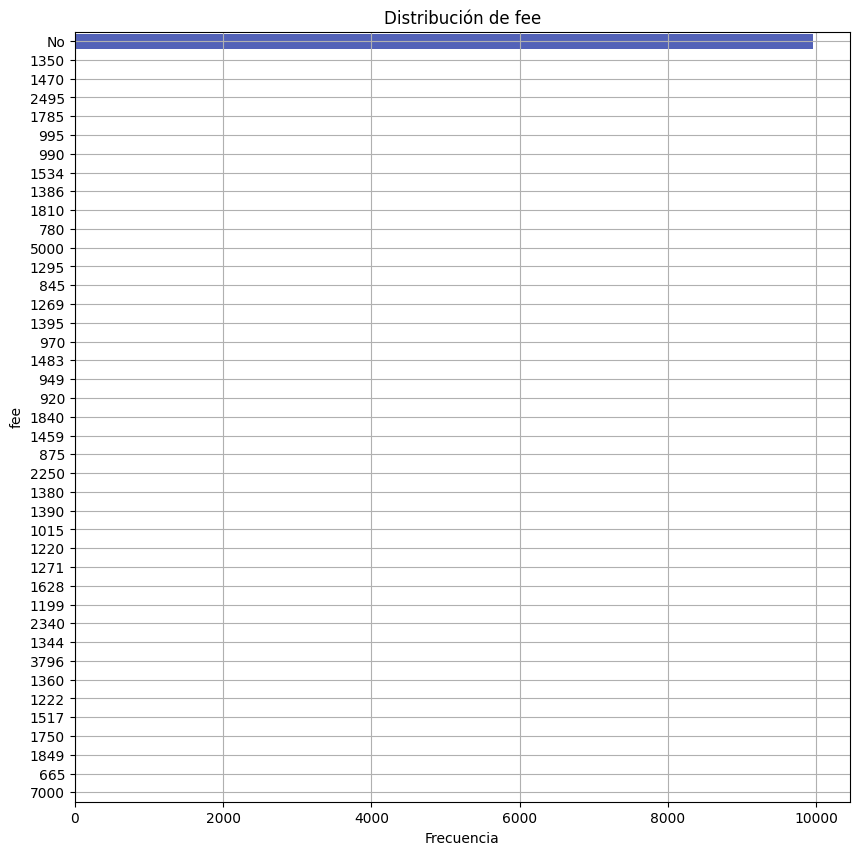

C:\Users\andy\AppData\Local\Temp\ipykernel_49988\1162452548.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(y=df[col], order=df[col].value_counts().index, palette='coolwarm')


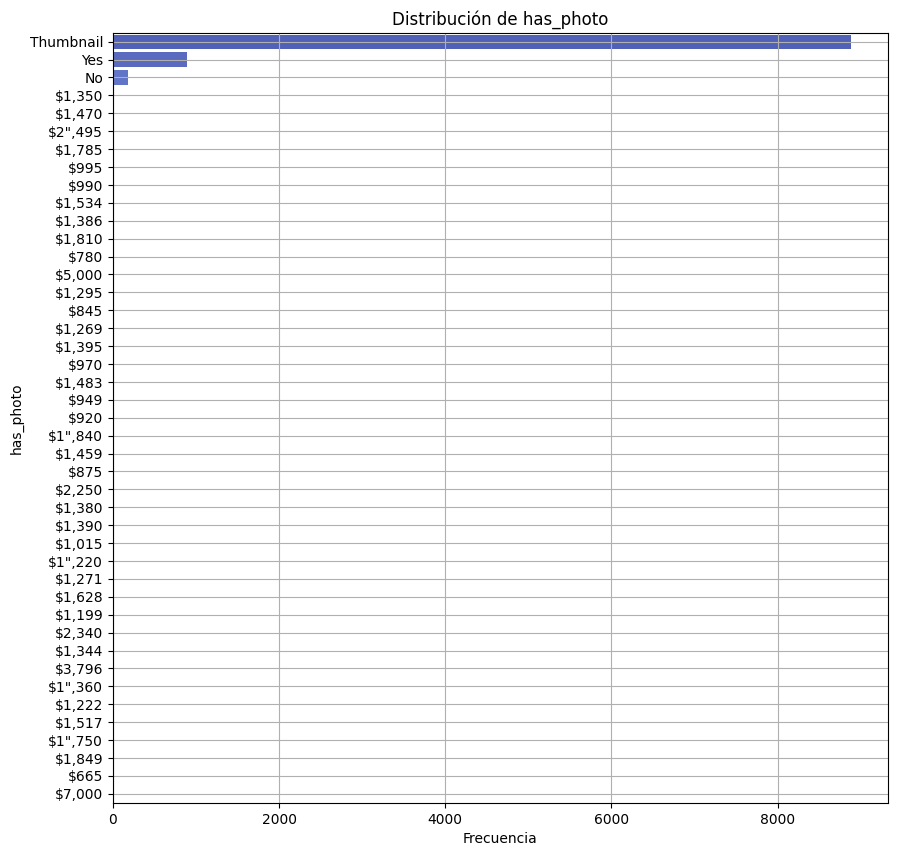

C:\Users\andy\AppData\Local\Temp\ipykernel_49988\1162452548.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(y=df[col], order=df[col].value_counts().index, palette='coolwarm')


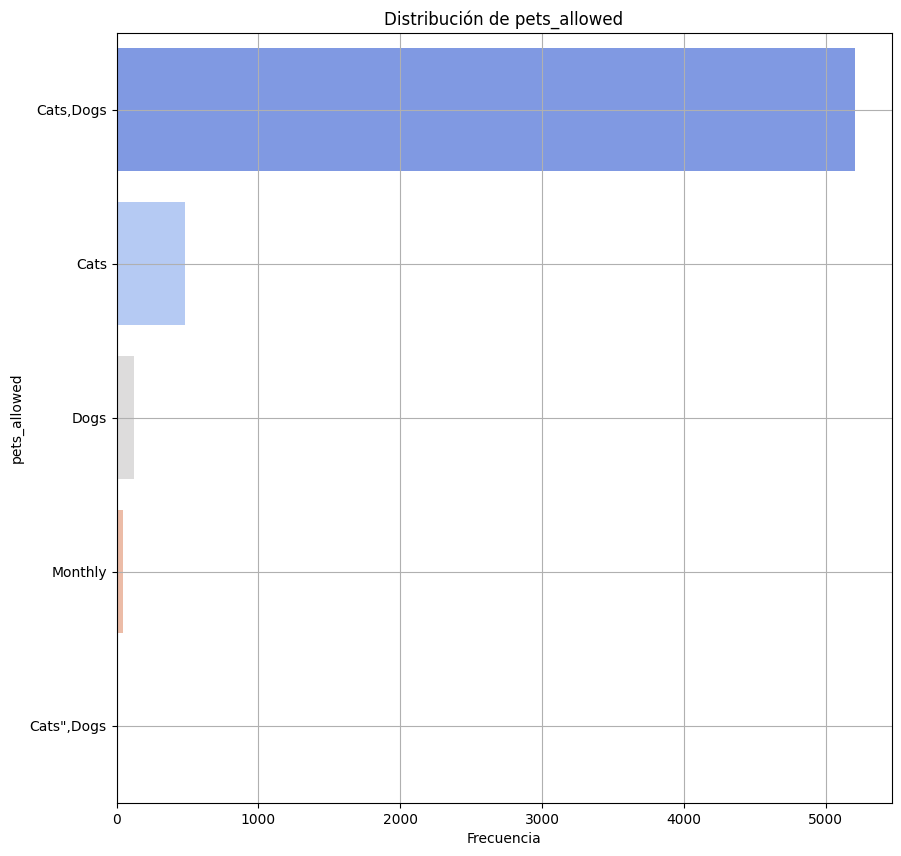

C:\Users\andy\AppData\Local\Temp\ipykernel_49988\1162452548.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(y=df[col], order=df[col].value_counts().index, palette='coolwarm')


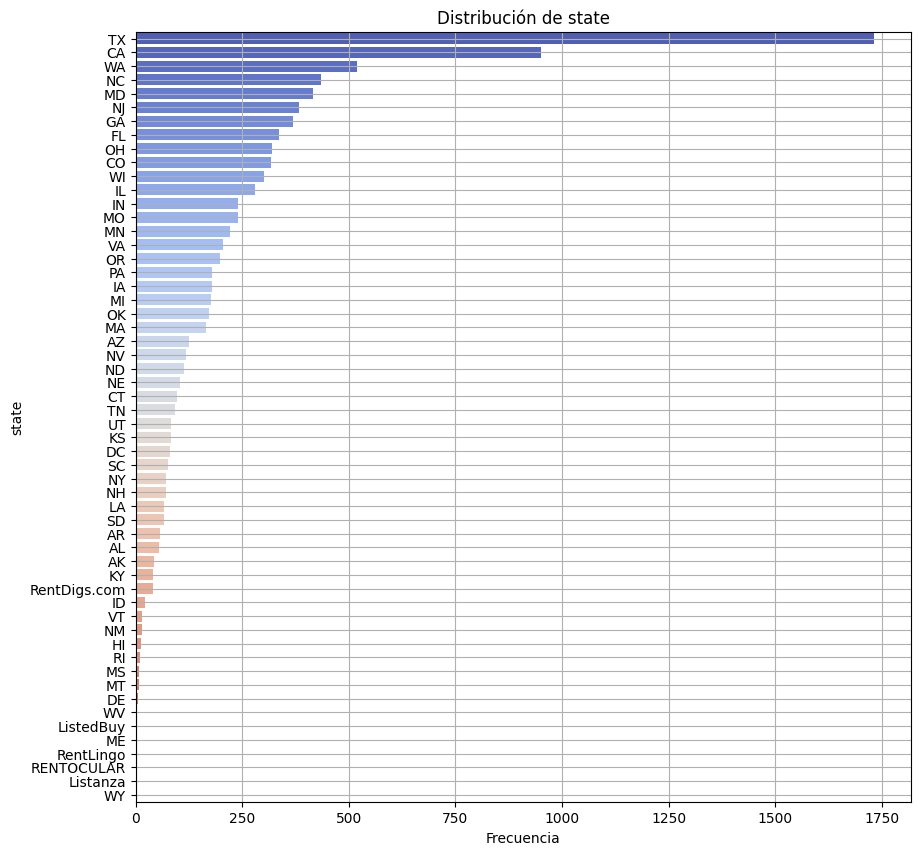

C:\Users\andy\AppData\Local\Temp\ipykernel_49988\1162452548.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(y=df[col], order=df[col].value_counts().index, palette='coolwarm')


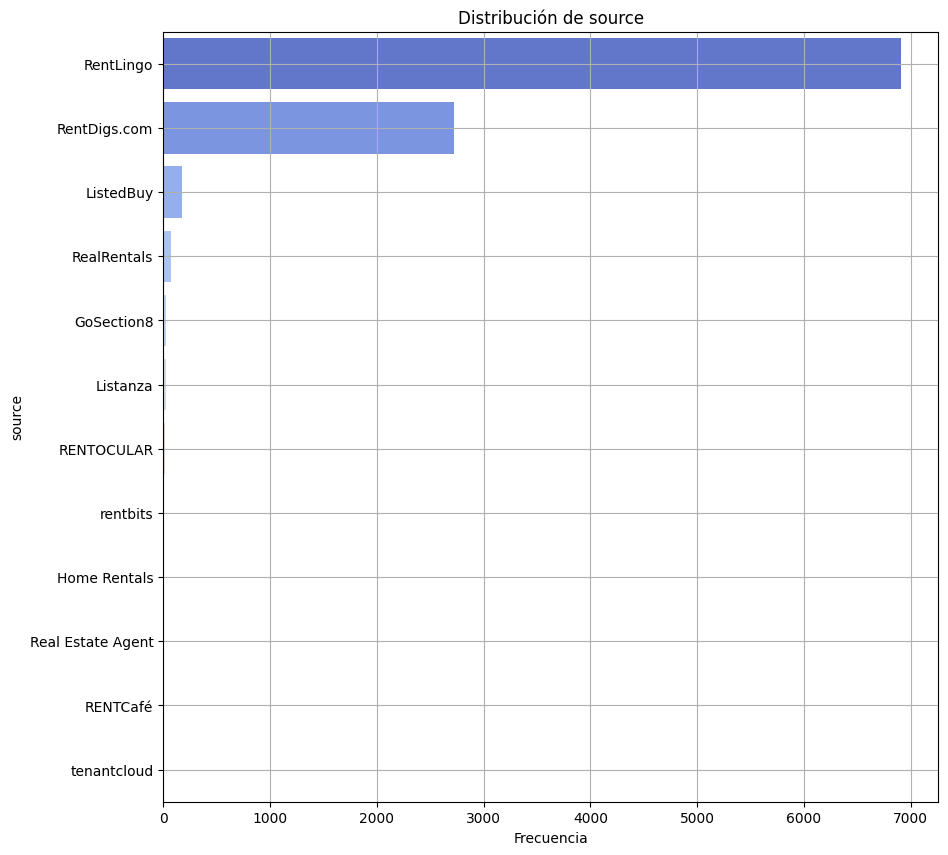

In [11]:
# grafica de barras de variables categoricas
categorical_columns = ['category', 'currency', 'fee', 'has_photo', 'pets_allowed', 'state', 'source']

for col in categorical_columns:
    plt.figure(figsize=(10, 10))
    sb.countplot(y=df[col], order=df[col].value_counts().index, palette='coolwarm')
    plt.title(f'Distribución de {col}')
    plt.xlabel('Frecuencia')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()


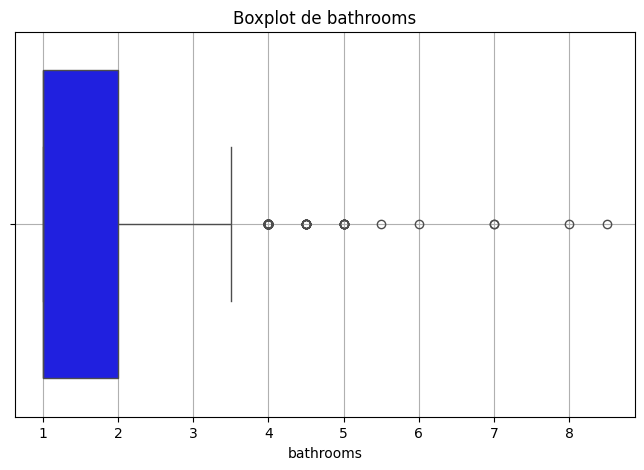

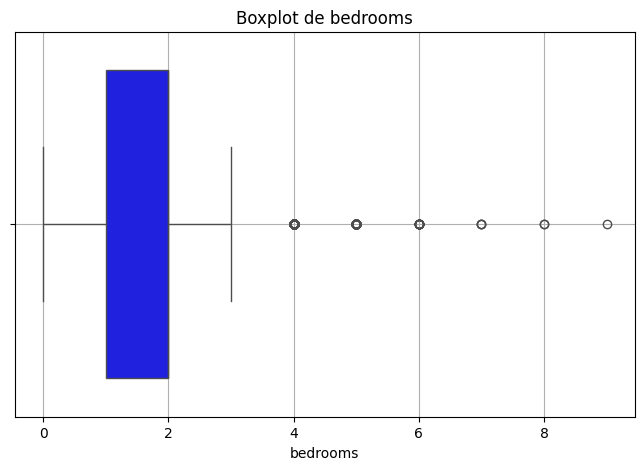

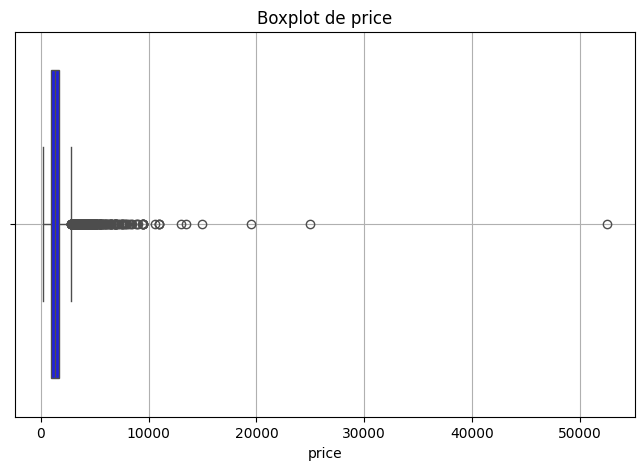

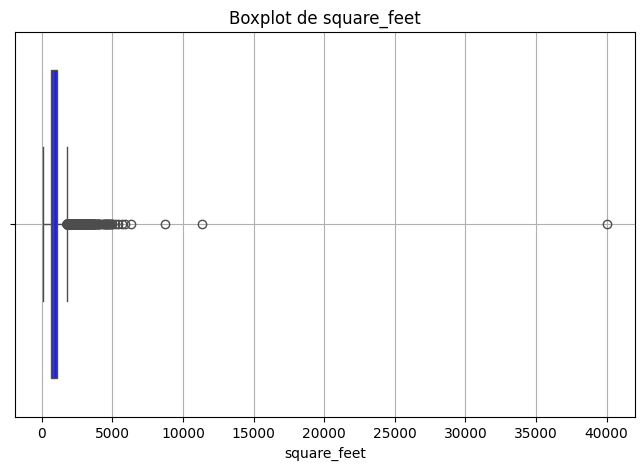

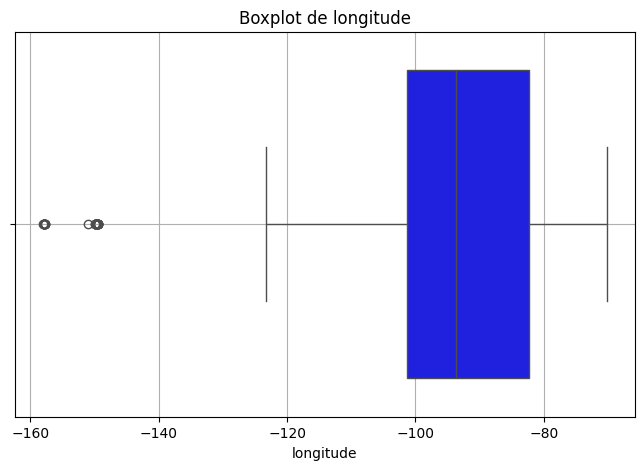

In [12]:
# Boxplot variables numéricas
numeric_columns = ['bathrooms', 'bedrooms', 'price', 'square_feet', 'longitude']

for col in numeric_columns:
    plt.figure(figsize=(8, 5))  
    sb.boxplot(x=df[col], color='blue')  
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()


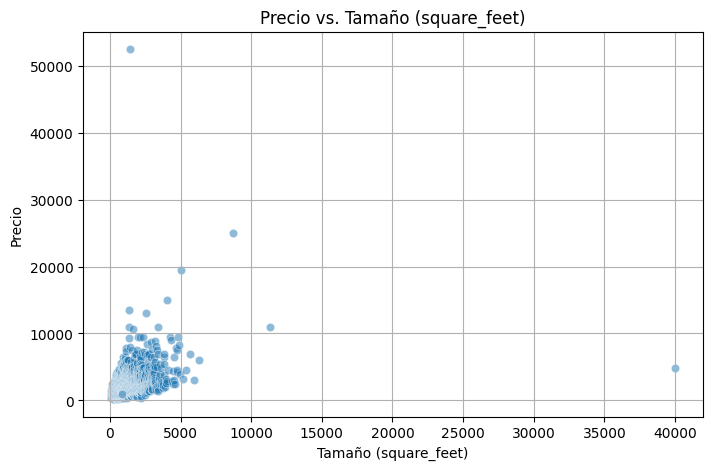

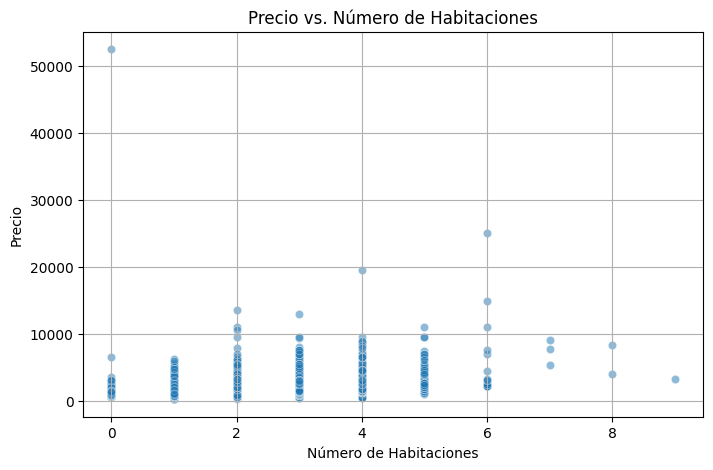

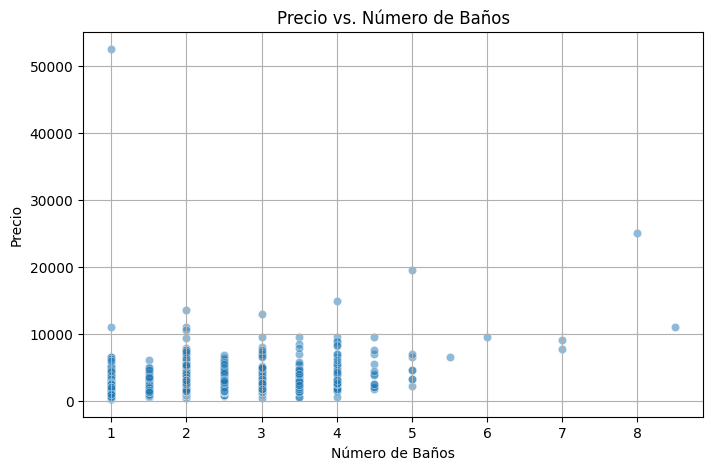

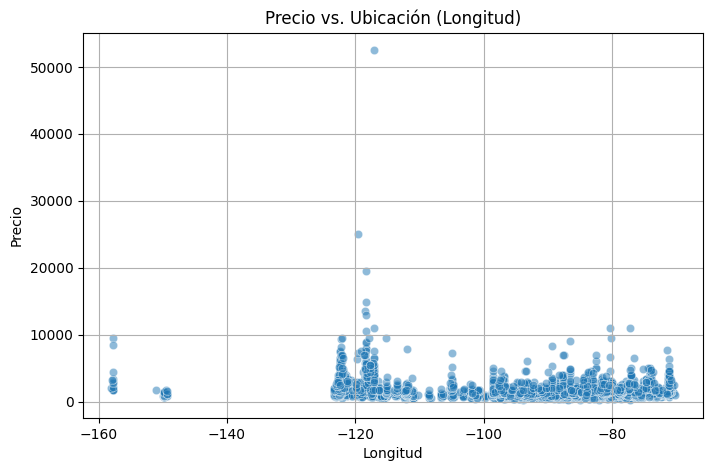

In [13]:
#Graficos de Dispercion 

#Precio-metros cuadrados
plt.figure(figsize=(8, 5))
sb.scatterplot(x=df['square_feet'], y=df['price'], alpha=0.5)
plt.title('Precio vs. Tamaño (square_feet)')
plt.xlabel('Tamaño (square_feet)')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

#Precio-num habitaciones
plt.figure(figsize=(8, 5))
sb.scatterplot(x=df['bedrooms'], y=df['price'], alpha=0.5)
plt.title('Precio vs. Número de Habitaciones')
plt.xlabel('Número de Habitaciones')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

#Precio-num baños
plt.figure(figsize=(8, 5))
sb.scatterplot(x=df['bathrooms'], y=df['price'], alpha=0.5)
plt.title('Precio vs. Número de Baños')
plt.xlabel('Número de Baños')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

#Precio-longitud
plt.figure(figsize=(8, 5))
sb.scatterplot(x=df['longitude'], y=df['price'], alpha=0.5)
plt.title('Precio vs. Ubicación (Longitud)')
plt.xlabel('Longitud')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

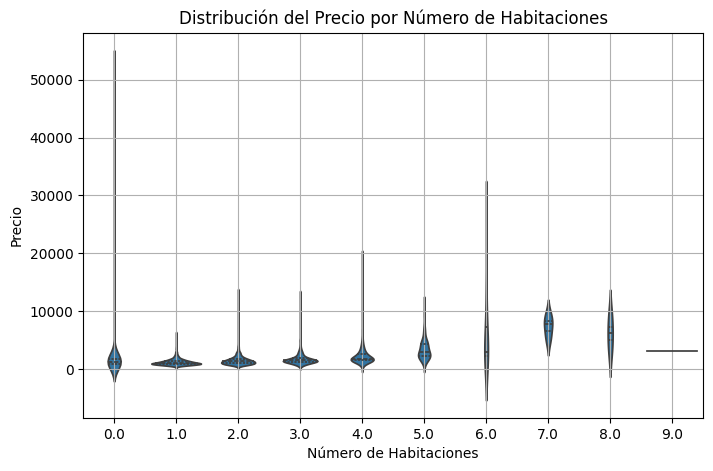

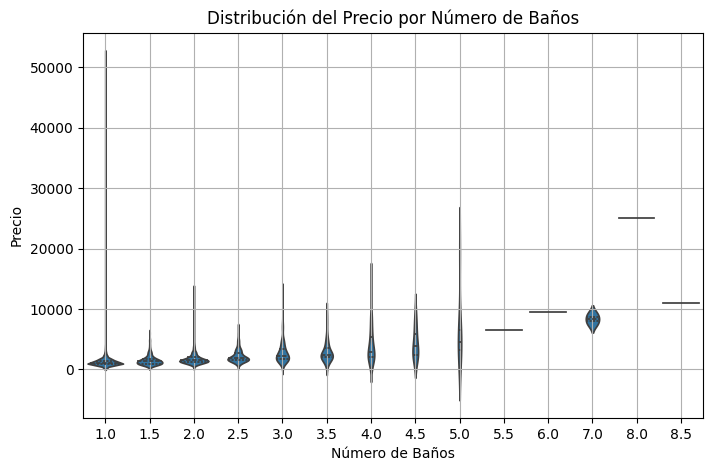

In [14]:
#Graficos de Violin 

#precio-habitaciones
plt.figure(figsize=(8, 5))
sb.violinplot(x=df['bedrooms'], y=df['price'], inner='quartile')
plt.title('Distribución del Precio por Número de Habitaciones')
plt.xlabel('Número de Habitaciones')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

#baños-precio
plt.figure(figsize=(8, 5))
sb.violinplot(x=df['bathrooms'], y=df['price'], inner='quartile')
plt.title('Distribución del Precio por Número de Baños')
plt.xlabel('Número de Baños')
plt.ylabel('Precio')
plt.grid(True)
plt.show()


Durbin-Watson: 1.61197408065541


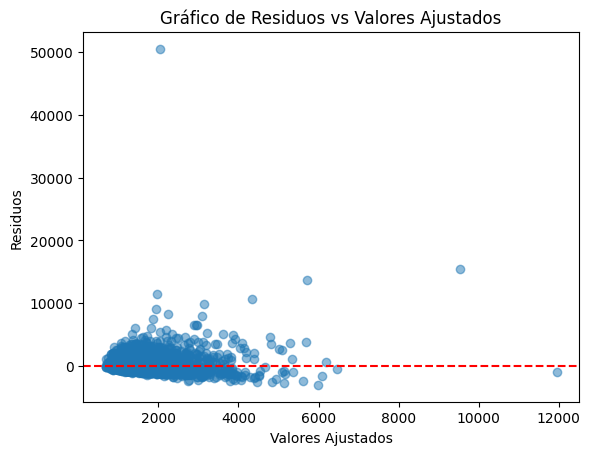

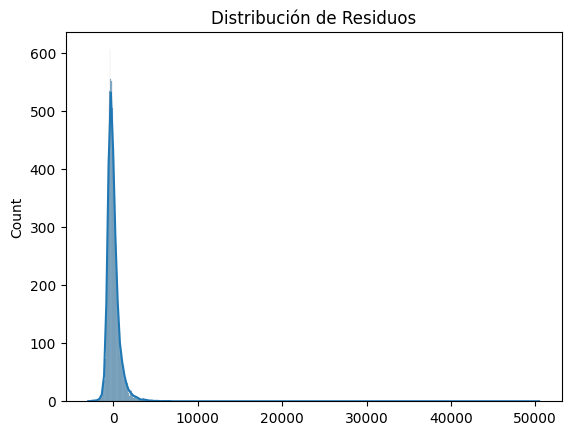

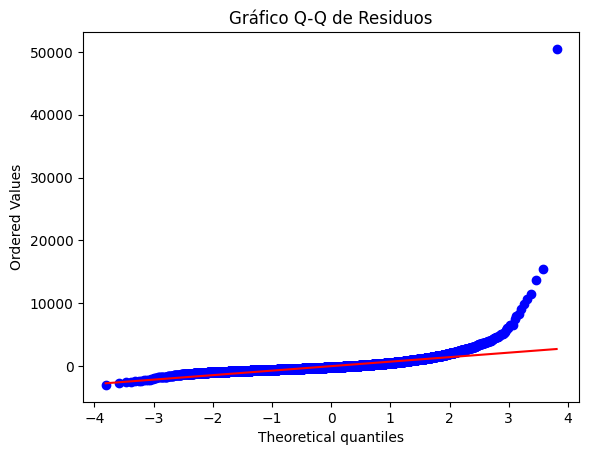

In [15]:
#linealidad de datos cuantitativos
df[['price', 'square_feet', 'bathrooms', 'bedrooms']].corr()



# independencia
X = df[['square_feet', 'bathrooms', 'bedrooms']]  
X = sm.add_constant(X)  # Agregar intercepto
y = df['price']  

X.replace([np.inf, -np.inf], np.nan, inplace=True)  
df_clean = X.join(y).dropna() 

X = df_clean.drop(columns=['price'])
y = df_clean['price']

modelo = sm.OLS(y, X).fit()

# Test Durbin-Watson
from statsmodels.stats.stattools import durbin_watson
residuals = modelo.resid
print("Durbin-Watson:", durbin_watson(residuals))


#Homocedasticidad
plt.scatter(modelo.fittedvalues, modelo.resid, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Valores Ajustados")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos vs Valores Ajustados")
plt.show()

#Normalidad

sb.histplot(modelo.resid, kde=True)
plt.title("Distribución de Residuos")
plt.show()

stats.probplot(modelo.resid, dist="norm", plot=plt)
plt.title("Gráfico Q-Q de Residuos")
plt.show()
